# User Churn Prediction

## Problem definition:

A telecom company suffering from the churning of their members. This notebook aims to use a customer churn prediction model that indicates the customers with the highest propensity to attrite. This allows an efficient customer management, and a better allocation of the limited marketing resources for customer retention campaigns. 

Specifically, in this project, I use supervised learning models to identify the user features that best predict which users are the most likely to unsubscribe to the company's service and analyze top factors that influence user retention. Furthermore, I provide a potential solution: engage them with a speical offer with the intention that they continue the service. 

This notebook contains the analysis of data leading to the predictive model. The work consists in data cleaning, feature preprocessing, feature selection, exploratory data analysis and hypothesis testing, building of the predictive model, and recommendations. 


## Contents

<ul>
<li>[Part 1: Data Exploration](#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Selection](#Part-4:-Feature-Selection)
<li>[Part 5: Use Probabilities as Prediction Results](#Part-5:-Use-Probabilities-as-Prediction-Results)
</ul>

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('../data/churn.all')

In [2]:
# print dataframe head
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
print "Num of rows: " + str(churn_df.shape[0]) # row count
print "Num of columns: " + str(churn_df.shape[1]) # col count

Num of rows: 5000
Num of columns: 21


### Part 1.2: Data cleaning

Remove Extra Whitespace

In [4]:
churn_df['voice_mail_plan'][0]

' yes'

In [5]:
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].map(lambda x: x.strip())
churn_df['intl_plan'] = churn_df['intl_plan'].map(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].map(lambda x: x.strip())

### Part 1.3:  Understand the features

/Users/XIAOYU/anaconda/envs/laidata1/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


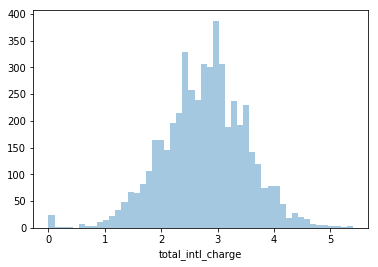

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# plot the distribution of one plot
sb.distplot(churn_df['total_intl_charge'], kde=False)

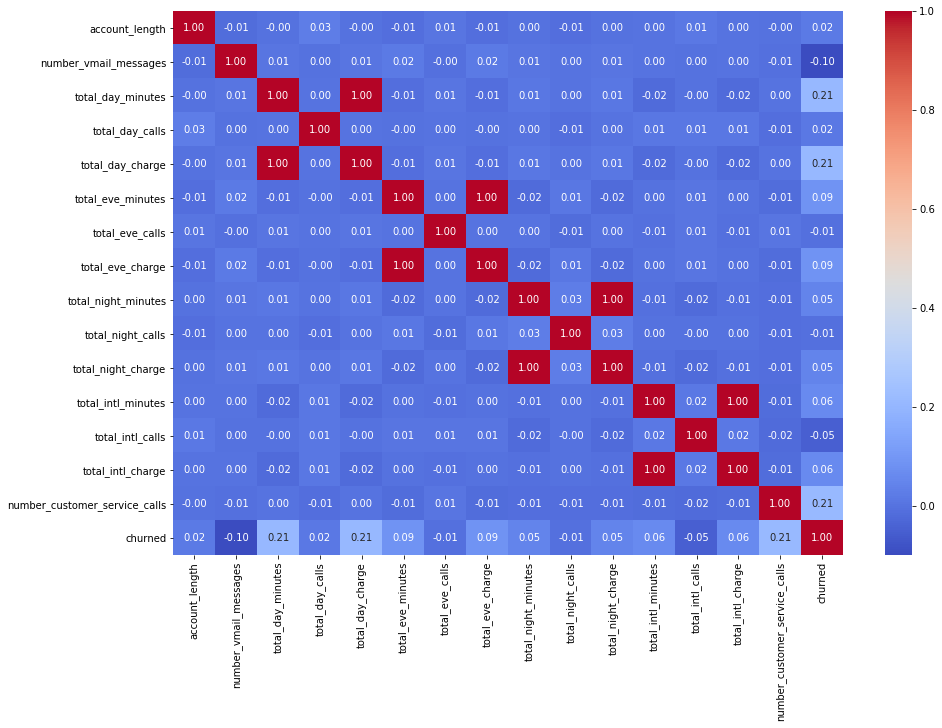

In [7]:
# Get ground truth data
y = np.where(churn_df['churned'] == 'True.',1,0)

df_corr = churn_df
df_corr.churned = df_corr.churned.map({'False.':0, 'True.':1})
corr = df_corr.drop(['area_code'], axis=1).corr()

# show the correlation plot between features

fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sb.heatmap(corr,annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [8]:
# show the table of the correlation matrix
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445,0.021203
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086,-0.097633
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733,0.207705
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739,0.016130
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726,0.207700
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823,0.089288
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235,-0.006284
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836,0.089282
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.006655,-0.008533,0.045677
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.026949,0.000391,-0.000156,0.000368,-0.008283,-0.006986


#### pearsonr statistic coefficient

In [9]:
from scipy.stats import pearsonr
print ('Pearson correlation coefficient is: ', pearsonr(churn_df['total_day_minutes'], churn_df['total_day_charge'])[0])
print ('Pearson correlation coefficient is: ', pearsonr(churn_df['total_eve_minutes'], churn_df['total_eve_charge'])[0])
print ('Pearson correlation coefficient is: ', pearsonr(churn_df['total_intl_minutes'], churn_df['total_intl_charge'])[0])


('Pearson correlation coefficient is: ', 0.9999999509831993)
('Pearson correlation coefficient is: ', 0.9999997748632398)
('Pearson correlation coefficient is: ', 0.999992657020837)



We can see that: the call minutes and call charge are perfectly correlated. The features that are linearly correlated with churned are intl_plan and total_day_charge, and number_customer_service calls.



# Part 2: Feature Preprocessing

In [10]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [11]:
print "the number of row " + str(churn_df.shape[0])
print "the number of col " + str(churn_df.shape[1])


the number of row 5000
the number of col 21


### 2.1 Original Scaled Dataset

In [12]:
# Drop some useless columns: phone number and account length have no effect on the churn rate
to_drop = ['phone_number','churned', 'account_length', 'state','area_code']
churn_origin = churn_df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_origin[yes_no_cols] = churn_origin[yes_no_cols] == 'yes'

##  X1 denotes data matrix without considering one hot encoding
# Converts data frame to its Numpy-array representation.
X = churn_origin.as_matrix().astype(np.float)
churn_origin.head()

,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


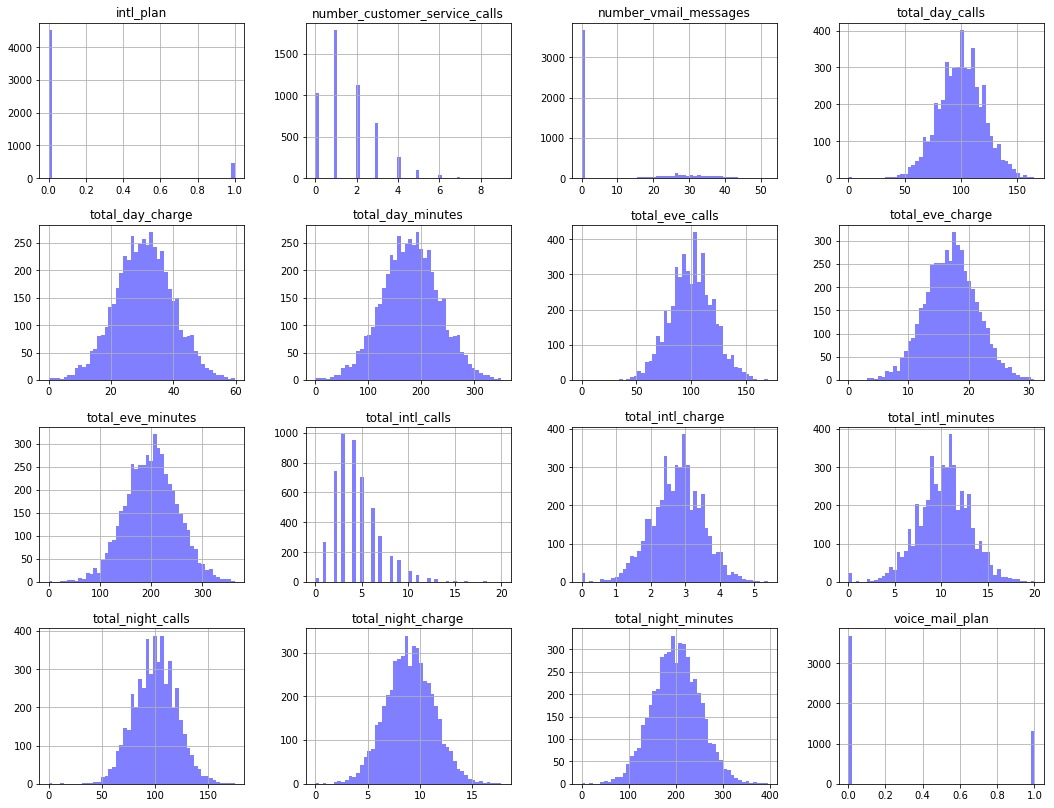

In [13]:
# plot the distribution of features: indicate the need for rescaling the data
distribution = churn_origin.hist(color='b', alpha=0.5, bins=50, figsize=(18, 14))

#### Plot Observations

The distribution plots show that most columns, such as Night Chage Eve Chage, are normal and are not skewed to the left or right indicating no statistical bias. That is great news. This means these distributions are accurate sample populations of the true underlying populations. However, rescaling is needed for the further analysis

#### Reasons for Feature_scaling (wiki)

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.



In [14]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_feature_important = X[:]

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 5000 observations and 16 features
Unique target labels: [0 1]


In [15]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

#X, y = shuffle(X, y) # shuffle the data
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X, y, test_size = 0.2)

/Users/XIAOYU/anaconda/envs/laidata1/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 2.2 One Hot Encoding Dataset

In [16]:
# Drop some useless columns: phone number and account length have no effect on the churn rate
to_drop = ['phone_number','churned', 'account_length']
churn_2 = churn_df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values

yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_2[yes_no_cols] = churn_2[yes_no_cols] == 'yes'

churn_2.head()

,state,area_code,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [17]:
# one hot encoding area code
OHE_area_code = pd.get_dummies(churn_2['area_code'], prefix='area_code')

# one hot encoding state
OHE_state = pd.get_dummies(churn_2['state'], prefix='state')

print "OHE_area_code" + str(OHE_area_code.shape)
print "OHE_state" + str(OHE_state.shape)
OHE_state.head()

OHE_area_code(5000, 3)
OHE_state(5000, 51)


,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 Put the encoded data back to the dataframe file (churn_2)

In [18]:
# convert area code and state column into one hot encoder; and drop the original columns

churn_ohe_areacode = pd.concat([churn_2,OHE_area_code],axis=1).drop(['area_code'],axis=1)
churn_ohe = pd.concat([churn_ohe_areacode,OHE_state],axis=1).drop(['state'],axis=1)

print churn_ohe.shape
churn_ohe.head()

(5000, 70)


,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
print "After preprocessing and one hot encoding"
print "The number of row: " + str(churn_ohe.shape[0])
print "The number of col: " + str(churn_ohe.shape[1])
       
# Move the columns with boolean features to the end
cols_at_end = ['intl_plan', 'voice_mail_plan']
churn_ohe = churn_ohe[[c for c in churn_ohe if c not in cols_at_end] + [c for c in cols_at_end if c in churn_ohe]]

# Converts data frame to its Numpy-array representation.
X_OHE = churn_ohe.as_matrix().astype(np.float)
print "The one hot encoding columns start from column: ", churn_ohe.columns.get_loc('area_code_408')


After preprocessing and one hot encoding
The number of row: 5000
The number of col: 70
The one hot encoding columns start from column:  14


Scale the feature matrix after one-hot-encoding

In [20]:
# The boolean features do not need to be scaled
X_OHE[:,:14] = scaler.fit_transform(X_OHE[:,:14])
y_OHE = y
print X_OHE[0,:]
print "Feature space holds %d observations and %d features" % X_OHE.shape
print "Unique target labels:", np.unique(y)

[ 1.27314513  1.57380195  0.50282376  1.57407401 -0.06403165 -0.06007714
 -0.06384907  0.87699882 -0.44692782  0.87628638 -0.09480937 -0.58423577
 -0.0955088  -0.43667564  0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.        ]
Feature space holds 5000 observations and 70 features
Unique target labels: [0 1]


In [21]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

#X_OHE, y_OHE = shuffle(X_OHE, y_OHE) # shuffle the data
X_train_OHE, X_test_OHE, y_train_OHE, y_test_OHE = train_test_split(X_OHE, y_OHE, test_size = 0.2)

### 2.3 SMOTE: Synthetic Minority Over-sampling Technique Dataset

#### Why SMOTE?

In this project, we are interested in a fairly high rate of correct detection of the minority class (churn) and we are wiling to allow for a small error rate in the majority class (don't churn). However, an imbalanced data set prevents a classifier from being properly trained. Without enough churn data points, the classifer will not be able to learn enough of the predictive indicators of churn.

Churn are categorical and have a Bernoulli distribution. Take a close look at the churn distribution. It is telling us that we highly unbalanced classes. This is going to be very problematic for any predictive model. Highly unbalanced labels will bias our model's performance, resulting in poor performance in predicting the minority class. We'll have to address this issue after we scale our data.

#### Churned number and rate：

In [22]:
churned_num = np.count_nonzero(y)
churned_perc = float(churned_num)/len(y)
print "total churned customers = " + str(churned_num)
print "churned customers percentage = " + "{0:.3%}".format(churned_perc)
print "Not churned percentage = " + "{0:.3%}".format(1 - churned_perc)

total churned customers = 707
churned customers percentage = 14.140%
Not churned percentage = 85.860%


SMOTE uses the KNearestNeighbors classifier to generate new users who churn. However, unlike the oversampling approach, these new users will not be identitical replications of exisitng users. These users will have very similar features as existing users who churn (as one might expect), however with some slight random variation to minimize overfitting to the data set. This seems like the right comprimise between high performance and overfitting.

In [23]:
from imblearn.over_sampling import SMOTE


In [24]:
# balance the orignal feature matrix 
sm = SMOTE(kind='regular')
X_smote_origin, y_smote_origin = sm.fit_sample(X_train_origin, y_train_origin)
X_smote, X_test_smote, y_smote, y_test_smote = train_test_split(X_smote_origin, y_smote_origin, test_size = 0)
#X_smote, y_smote = shuffle(X_smote, y_smote) # shuffle the data
#X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0, random_state=1234)

### 2.4 SMOTE & OHE Dataset

In [25]:
# balance the feature matrix after one-hot-encoding
X_smote_OHE, y_smote_OHE = sm.fit_sample(X_train_OHE, y_train_OHE)
X_smoteohe, X_test_smoteohe, y_smoteohe, y_test_smote = train_test_split(X_smote_OHE, y_smote_OHE, test_size = 0)
#X_smote_OHE, y_smote_OHE = shuffle(X_smote, y_smote) # shuffle the data
#X_train_smoteohe, X_test_smoteohe, y_train_smoteohe, y_test_smote = train_test_split(X_smote_OHE, y_smote_OHE, test_size = 0, random_state=1234)

# Part 3: Model Training and Result Evaluation

### Part 3.3: Use Grid Search to Find Optimal Parameters (this if for hyperparameters)

#### METRICS： Both Precision and Recall are selected to evaluate the performance of candidate models

The precision in this case represents: when a classifier predicts an individual will churn, what is the probablity of that individual actually churn?

The recall represents: in the group of customer that do churn, how many of them is classifier able to correclty identifiy?

If we were to just assume that every user doesn't churn, then our accuracy would be 85.860% because the vast majority don't churn. But this tells us nothing about how well we can identify those users who actually do or do not churn, nor how often we are correct in stating that a user is likely to churn. Therefore, for this churn analysis, I did not use accuracy for evaluation since it can be misleading for imbalanced classes such as ours. For the evaluation of our model, I used precision and recall instead.

Here we use Average_precision_score as the evaluation metric for grid search, in order to consider both true positive rates and false positive rates. We will try Logistic Regression, KNN, Random Forest and Support Vector Machine Classifiers

In [26]:
# Plot learning curves
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import recall_score

def print_grid_search_metrics(gs, parameters):
    print "Best score: %0.3f" % gs.best_score_
    print "Best parameters set:"
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

### Part 3.3.1: Find Optimal Parameters - LogisticRegression

In [28]:
# scoring = {'PR_curve': make_scorer(precision_recall_curve),
#            'Precision': make_scorer(precision_score),
#            'Recall': make_scorer(recall_score)
#             }
# scoring = 'f1'
scoring = 'average_precision'

 #### Dataset 1

In [29]:

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [30]:
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)

lr_param_grid = {
    'penalty':('l1', 'l2'), 
    'C':C_grid
}
Grid_LR1 = GridSearchCV(LogisticRegression(),lr_param_grid, scoring=scoring, verbose = 1,n_jobs=-1)

#Grid_LR1 = GridSearchCV(LogisticRegression(),lr_param_grid, cv=kfold, scoring=scoring, refit = 'Accuracy')


Grid_LR1.fit(X_train_origin, y_train_origin)
print_grid_search_metrics(Grid_LR1, lr_param_grid)

lr = Grid_LR1.best_estimator_

Fitting 3 folds for each of 202 candidates, totalling 606 fits


[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:    5.8s


Best score: 0.472
Best parameters set:
	C: 0.001
	penalty: 'l2'


[Parallel(n_jobs=-1)]: Done 606 out of 606 | elapsed:   12.2s finished


#### Dataset 2

In [31]:
Grid_LR2 = GridSearchCV(LogisticRegression(),lr_param_grid, scoring=scoring, verbose = 1,n_jobs=-1)
Grid_LR2.fit(X_train_OHE, y_train_OHE)
print_grid_search_metrics(Grid_LR2, lr_param_grid)
lr_OHE = Grid_LR2.best_estimator_

Fitting 3 folds for each of 202 candidates, totalling 606 fits


[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    1.4s


Best score: 0.472
Best parameters set:
	C: 0.28840315031266056
	penalty: 'l2'


[Parallel(n_jobs=-1)]: Done 606 out of 606 | elapsed:    6.8s finished


#### Dataset 3

In [32]:
Grid_LR3 = GridSearchCV(LogisticRegression(),lr_param_grid, scoring=scoring, verbose = 1,n_jobs=-1)
Grid_LR3.fit(X_smote_origin, y_smote_origin)
print_grid_search_metrics(Grid_LR3, lr_param_grid)
lr_smote = Grid_LR2.best_estimator_

Fitting 3 folds for each of 202 candidates, totalling 606 fits


[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:    4.2s


Best score: 0.819
Best parameters set:
	C: 0.001
	penalty: 'l2'


[Parallel(n_jobs=-1)]: Done 606 out of 606 | elapsed:    8.5s finished


### Part 3.3.2: Find Optimal Parameters: KNN

#### Dataset 1

In [33]:
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}
Grid_KNN1 = GridSearchCV(KNeighborsClassifier(),knn_param_grid,scoring=scoring, verbose = 1,n_jobs=-1)
Grid_KNN1.fit(X_train_origin, y_train_origin)
print_grid_search_metrics(Grid_KNN1,knn_param_grid)

knn = Grid_KNN1.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best score: 0.723
Best parameters set:
	n_neighbors: 16
	weights: 'distance'


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.6s finished


#### Dataset 2

In [34]:
Grid_KNN2 = GridSearchCV(KNeighborsClassifier(),knn_param_grid, scoring=scoring, verbose = 1,n_jobs=-1)
Grid_KNN2.fit(X_train_OHE, y_train_OHE)
print_grid_search_metrics(Grid_KNN2,knn_param_grid)
knn_OHE = Grid_KNN2.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best score: 0.676
Best parameters set:
	n_neighbors: 16
	weights: 'distance'


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   13.5s finished


#### Dataset 3

In [35]:
Grid_KNN3 = GridSearchCV(KNeighborsClassifier(),knn_param_grid, scoring=scoring, verbose = 1,n_jobs=-1)
Grid_KNN3.fit(X_smote_origin, y_smote_origin)
print_grid_search_metrics(Grid_KNN3,knn_param_grid)
knn_smote = Grid_KNN3.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best score: 0.978
Best parameters set:
	n_neighbors: 16
	weights: 'distance'


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    6.6s finished


### Part 3.3.3: Random Forest hyperparameter tuning

#### Dataset 1

In [36]:
rf_param_grid = {
    'max_depth': [4, 8, 14],
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6)
}

Grid_RF1 = GridSearchCV(RandomForestClassifier(), param_grid = rf_param_grid , scoring=scoring, verbose = 1,n_jobs=-1)
Grid_RF1.fit(X_train_origin,y_train_origin)
print_grid_search_metrics(Grid_RF1,rf_param_grid)
rf = Grid_RF1.best_estimator_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.5s


Best score: 0.862
Best parameters set:
	max_depth: 8
	min_samples_leaf: 2
	min_samples_split: 6


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    8.8s finished


#### Dataset 2

In [37]:
Grid_RF2 = GridSearchCV(RandomForestClassifier(), param_grid = rf_param_grid , scoring=scoring, verbose = 1,n_jobs=-1)
Grid_RF2.fit(X_train_OHE, y_train_OHE)
print_grid_search_metrics(Grid_RF2,rf_param_grid)
rf_OHE = Grid_RF2.best_estimator_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.3s


Best score: 0.840
Best parameters set:
	max_depth: 14
	min_samples_leaf: 2
	min_samples_split: 4


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    9.3s finished


#### Dataset 3

In [38]:
Grid_RF3 = GridSearchCV(RandomForestClassifier(), param_grid = rf_param_grid, scoring=scoring, verbose = 1,n_jobs=-1)
Grid_RF3.fit(X_smote_origin, y_smote_origin)
print_grid_search_metrics(Grid_RF3,rf_param_grid)
rf_smote = Grid_RF2.best_estimator_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.0s


Best score: 0.986
Best parameters set:
	max_depth: 14
	min_samples_leaf: 1
	min_samples_split: 5


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   12.0s finished


### Part 3.3.4: SVM hyperparameter tuning

#### Dataset 1

The speed of SVC depends on:

    1. C parameter - greater the missclassification penalty, slower the process

    2. kernel - more complicated the kernel, slower the process (rbf is the most complex from the predefined ones)
    
    3. Data size

In [39]:
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
C_grid = 10**(np.arange(0,1.1,0.05)*2)
svm_param_grid = {'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

Grid_SVM1 = GridSearchCV(SVC(probability=True),svm_param_grid, scoring=scoring, verbose = 1,n_jobs=-1)# use all processors
Grid_SVM1.fit(X_train_origin, y_train_origin)
print_grid_search_metrics(Grid_SVM1,svm_param_grid)
svm = Grid_SVM1.best_estimator_

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:   43.6s finished


Best score: 0.814
Best parameters set:
	C: 300
	gamma: 0.01


#### Dataset 2

In [40]:
Grid_SVM2 = GridSearchCV(SVC(probability=True),svm_param_grid, scoring=scoring ,verbose = 1,n_jobs=-1)
Grid_SVM2.fit(X_train_OHE, y_train_OHE)
print_grid_search_metrics(Grid_SVM2,svm_param_grid)
svm_OHE = Grid_SVM2.best_estimator_

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  2.7min finished


Best score: 0.777
Best parameters set:
	C: 1
	gamma: 0.1


#### Dataset 3

In [41]:
Grid_SVM3 = GridSearchCV(SVC(probability=True),svm_param_grid, scoring=scoring ,verbose = 1,n_jobs=-1)
Grid_SVM3.fit(X_smote_origin, y_smote_origin)
print_grid_search_metrics(Grid_SVM3,svm_param_grid)
svm_smote = Grid_SVM2.best_estimator_

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  3.0min finished


Best score: 0.998
Best parameters set:
	C: 10
	gamma: 1


It can be found that the computational time for SVM is much higher than other classifiers

### Part 3.2: Compare models using learning curve

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

In [42]:
# Plot learning curves
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    count = 220
    fig = plt.figure(figsize = (17,12))
    for model in estimator:
        count+=1
        fig.add_subplot(count)   # left
        name = str(model)
        index = name.index('(')
        title = name[:index]

        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring,train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
    


In the learning curve, we should focus on the right side of the plot, where there are sufficient data for evaluation.

If two curves are "close to each other" and both of them but have a low score. The model suffer from an under fitting problem (High Bias)

If training curve has a much better score but testing curve has a lower score, i.e., there are large gaps between two curves. Then the model suffer from an over fitting problem (High Variance)

#### Dataset1: Original Dataset

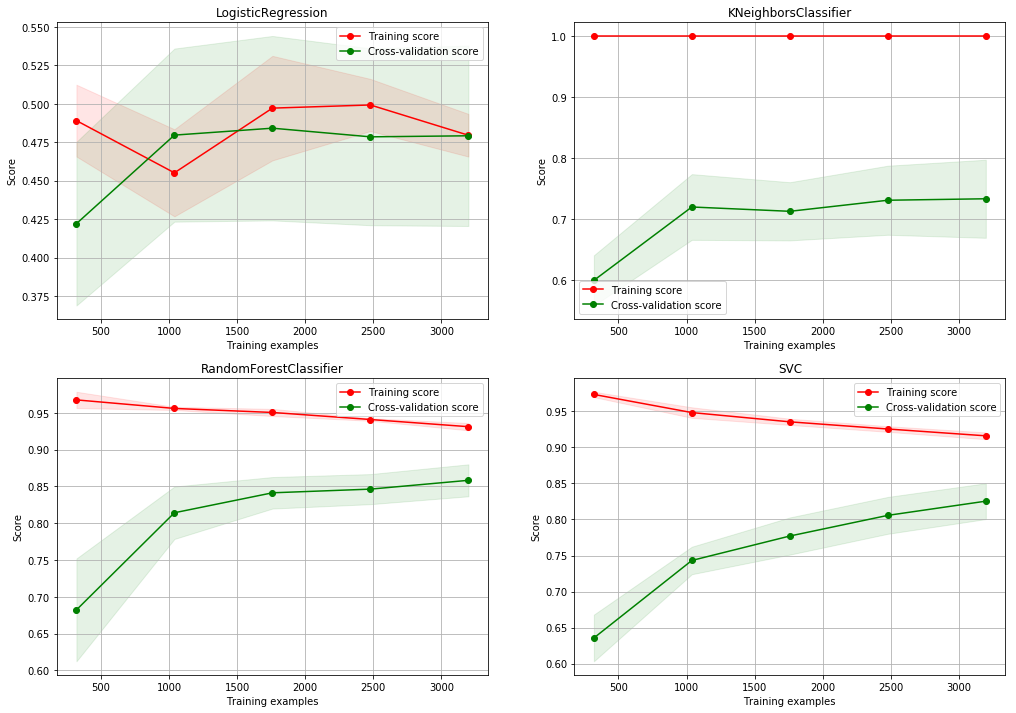

In [43]:

kfold = StratifiedKFold(n_splits=5)
title = []
estimator1 = [lr, knn, rf, svm]
plot_learning_curve(estimator1, title, X_train_origin, y_train_origin,cv =kfold,  n_jobs=-1)
#plot_learning_curve(estimator, title, X_train_OHE, y_train_OHE, ylim=(0.7, 1.01),cv =kfold,  n_jobs=4)


#### Dataset2: One Hot Encoding

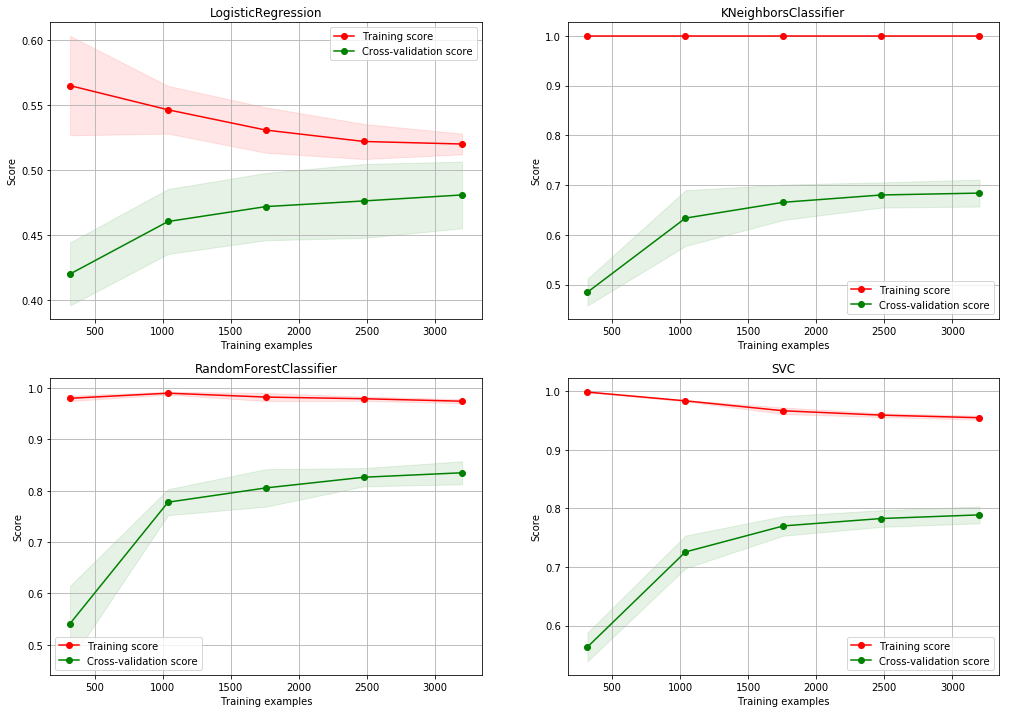

In [45]:
estimator2 = [lr_OHE, knn_OHE, rf_OHE, svm_OHE]
plot_learning_curve(estimator2, title, X_train_OHE, y_train_OHE,cv =kfold, n_jobs=-1)


It seems that the One Hot Encoding process introduces a large mount of features, and thus leading to overfitting problem in all four classifiers. It is also observed that the CV scores are less than those using dataset without considering encoded catergoric features

#### Dataset3: SMOTE sampling

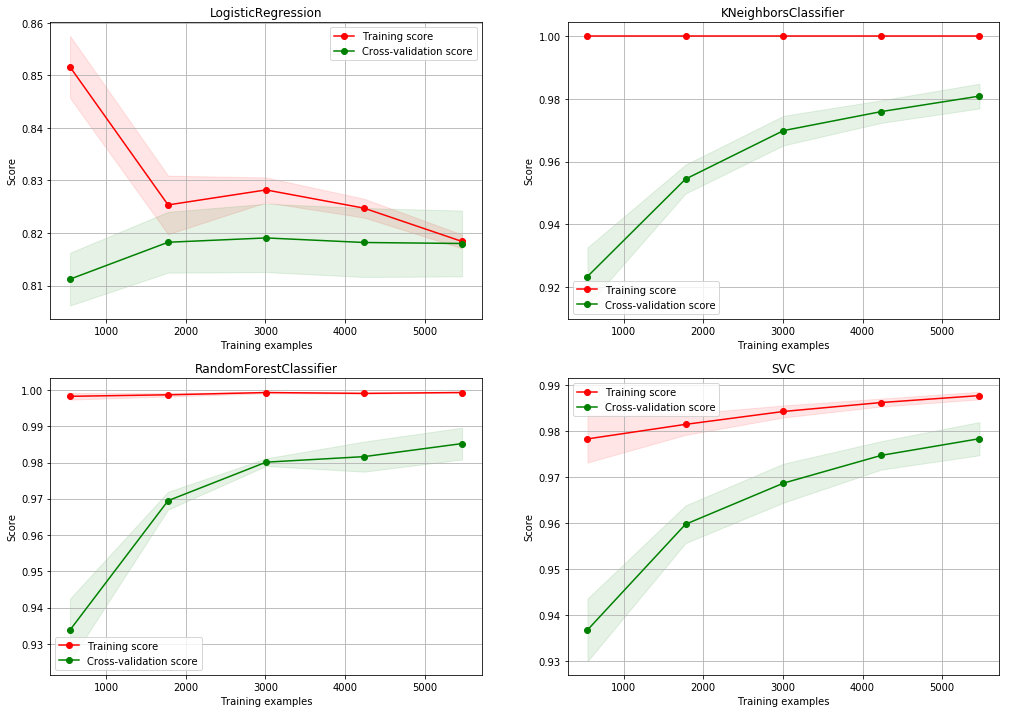

In [47]:
estimator3 = [lr_smote, knn_smote, rf_smote, svm_smote]

plot_learning_curve(estimator3, title, X_smote, y_smote,cv =kfold, n_jobs=-1)


The synthetic data points are introduced, the learning curve for Dataset 3 cannot represent the true training results. Thus, the model trained by smote datasets needs to be further evaluated using testing data

### Part 3.3: Calculate Confusion Matrix (Precision, Recall, Accuracy)

In [48]:
from sklearn.metrics import confusion_matrix



# input confusion m or classifier
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Precision is " + str(precision)
    print "Recall is " + str(recall)
    print("F1 score is " + str(f1))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for x in confusion_matrices:
        classifier, cm = x[0], x[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        
def get_probability(models_data_list):
    predicted_probs = []
    count = 0
    for model_data in models_data_list:
        #print count
        count += 1
        model = model_data[0]
        X_train_data = model_data[1]
        Y_train_data = model_data[2]
        X_test_data = model_data[3]
        Y_test_data = model_data[4]
        
        model.fit(X_train_data, Y_train_data)
        # models pass back two columns: class1 -> probs for class 0, col2 -> probs for class 1
        y_probs = model.predict_proba(X_test_data).T[1]
        predicted_probs.append([Y_test_data, y_probs])
        
    return predicted_probs

def get_prediction(models_data_list):
    predicted = []
    for model_data in models_data_list:
        model = model_data[0]
        X_train_data = model_data[1]
        Y_train_data = model_data[2]
        X_test_data = model_data[3]
        Y_test_data = model_data[4]
        
        model.fit(X_train_data, Y_train_data)
        # models pass back two columns: class1 -> probs for class 0, col2 -> probs for class 1
        y_pred = model.predict(X_test_data)
        predicted.append([Y_test_data, y_pred])
        
    return predicted

In [49]:
model_data_list2 = ([lr, X_train_origin, y_train_origin, X_test_origin, y_test_origin],
                   [knn, X_train_origin, y_train_origin, X_test_origin, y_test_origin], 
                   [rf, X_train_origin, y_train_origin, X_test_origin, y_test_origin], 
                   [svm, X_train_origin, y_train_origin, X_test_origin, y_test_origin],
                   [lr_OHE, X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE],
                   [knn_OHE, X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE],
                   [rf_OHE, X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE],
                   [svm_OHE, X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE])

model_data_list = ([lr, X_train_origin, y_train_origin, X_test_origin, y_test_origin],
                   [knn, X_train_origin, y_train_origin, X_test_origin, y_test_origin], 
                   [rf, X_train_origin, y_train_origin, X_test_origin, y_test_origin], 
                   [svm, X_train_origin, y_train_origin, X_test_origin, y_test_origin],
                   [lr_smote, X_smote_origin, y_smote_origin, X_test_origin, y_test_origin],
                   [knn_smote, X_smote_origin, y_smote_origin, X_test_origin,y_test_origin],
                   [rf_smote, X_smote_origin, y_smote_origin, X_test_origin, y_test_origin],
                   [svm_smote, X_smote_origin, y_smote_origin, X_test_origin, y_test_origin])


model_name = ["Logisitic Regression","K-Nearest-Neighbors", "Random Forest", "Support Vector Machine",
              "Logisitic Regression SMOTE","K-Nearest-Neighbors SMOTE", "Random Forest SMOTE", 
              "Support Vector Machine SMOTE"]
model_name2 = ["Logisitic Regression","K-Nearest-Neighbors", "Random Forest", "Support Vector Machine",
              "Logisitic Regression OHE","K-Nearest-Neighbors OHE", "Random Forest OHE", 
              "Support Vector Machine OHE"]

In [50]:
pred_probs = get_probability(model_data_list)
pred = get_prediction(model_data_list)

pred_probs_OHE = get_probability(model_data_list2)
pred_OHE = get_prediction(model_data_list2)

Logisitic Regression
Accuracy is 0.884
Precision is 0.6153846153846154
Recall is 0.192
F1 score is 0.29268292682926833


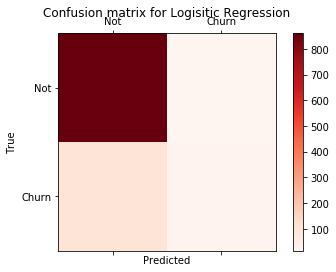

K-Nearest-Neighbors
Accuracy is 0.912
Precision is 0.8775510204081632
Recall is 0.344
F1 score is 0.4942528735632184


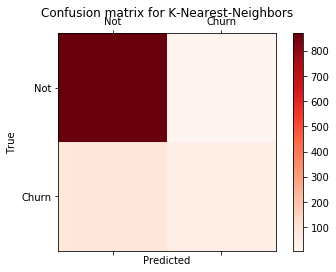

Random Forest
Accuracy is 0.96
Precision is 0.9473684210526315
Recall is 0.72
F1 score is 0.8181818181818181


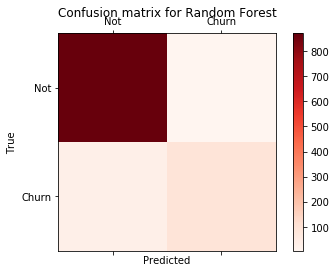

Support Vector Machine
Accuracy is 0.933
Precision is 0.7959183673469388
Recall is 0.624
F1 score is 0.6995515695067265


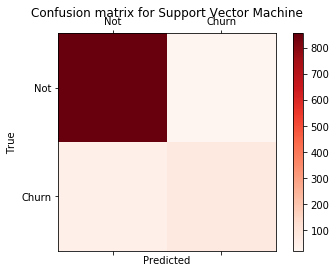

Logisitic Regression SMOTE
Accuracy is 0.762
Precision is 0.3122923588039867
Recall is 0.752
F1 score is 0.4413145539906103


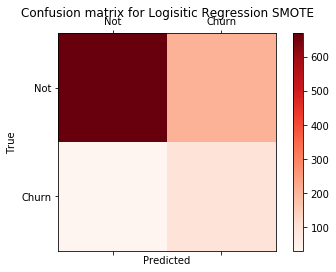

K-Nearest-Neighbors SMOTE
Accuracy is 0.849
Precision is 0.44396551724137934
Recall is 0.824
F1 score is 0.5770308123249299


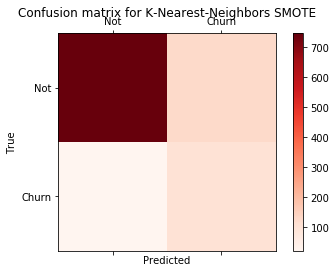

Random Forest SMOTE
Accuracy is 0.951
Precision is 0.7753623188405797
Recall is 0.856
F1 score is 0.8136882129277566


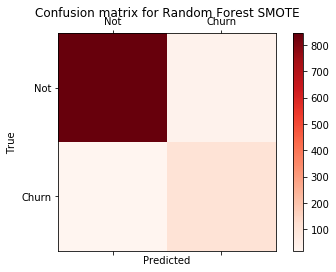

Support Vector Machine SMOTE
Accuracy is 0.928
Precision is 0.6992481203007519
Recall is 0.744
F1 score is 0.7209302325581395


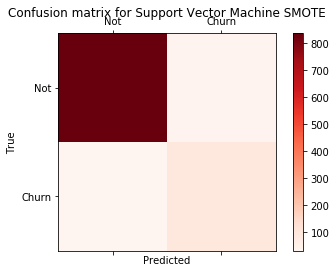

In [51]:
# confusion_matrices
confusion_matrices = []
curr = 0
for y_true, y_pred in pred:
    
    mn = model_name[curr]
    curr+= 1
    cm = (mn, confusion_matrix(y_true, y_pred))
    confusion_matrices.append(cm)
  
%matplotlib inline
draw_confusion_matrices(confusion_matrices)

In [52]:
confusion_matrices2 = []
curr2 = 0
for y_true, y_pred in pred_OHE:
    
    mn2 = model_name2[curr2]
    curr2 += 1
    cm2 = (mn2, confusion_matrix(y_true, y_pred))
    confusion_matrices2.append(cm2)
  


Logisitic Regression
Accuracy is 0.884
Precision is 0.6153846153846154
Recall is 0.192
F1 score is 0.29268292682926833


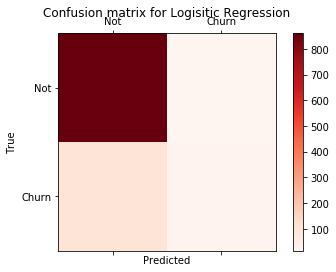

K-Nearest-Neighbors
Accuracy is 0.912
Precision is 0.8775510204081632
Recall is 0.344
F1 score is 0.4942528735632184


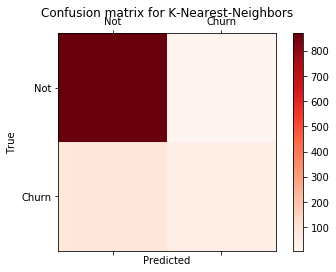

Random Forest
Accuracy is 0.96
Precision is 0.9473684210526315
Recall is 0.72
F1 score is 0.8181818181818181


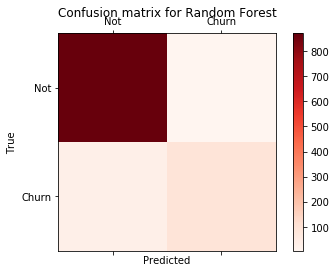

Support Vector Machine
Accuracy is 0.933
Precision is 0.7959183673469388
Recall is 0.624
F1 score is 0.6995515695067265


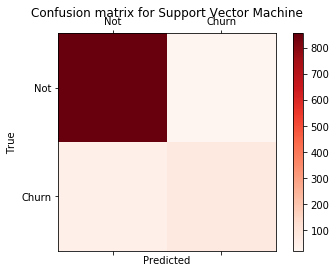

Logisitic Regression SMOTE
Accuracy is 0.762
Precision is 0.3122923588039867
Recall is 0.752
F1 score is 0.4413145539906103


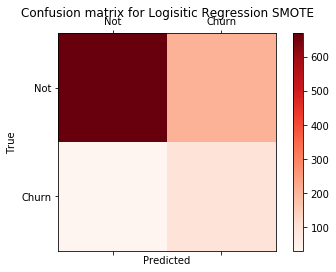

K-Nearest-Neighbors SMOTE
Accuracy is 0.849
Precision is 0.44396551724137934
Recall is 0.824
F1 score is 0.5770308123249299


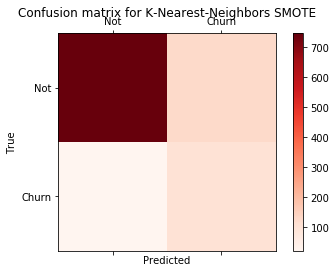

Random Forest SMOTE
Accuracy is 0.951
Precision is 0.7753623188405797
Recall is 0.856
F1 score is 0.8136882129277566


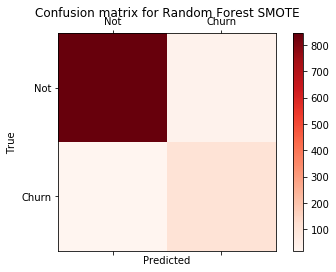

Support Vector Machine SMOTE
Accuracy is 0.928
Precision is 0.6992481203007519
Recall is 0.744
F1 score is 0.7209302325581395


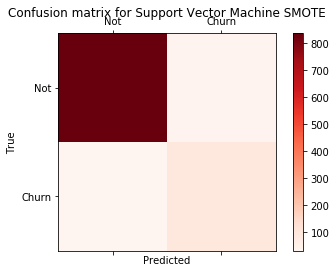

In [53]:
draw_confusion_matrices(confusion_matrices2)

In [54]:
def plot_roc_curves(prob_list, model_names):
    fpr_list = []
    tpr_list = []
    auc_list = []
    for y_true, y_prob in prob_list:

        fpr, tpr, thresholds = roc_curve(y_true, y_prob)
        area_under_curve = auc(fpr, tpr)

        fpr_list.append(fpr)
        tpr_list.append(tpr)
        auc_list.append(area_under_curve)

    x = np.arange(0,y_true.shape[0]+1, y_true.shape[0])
    y = x


    plt.figure(figsize = (16,8))
    plt.title("ROC Curve")
    plt.ylabel("TPR")
    plt.xlabel("FPR")
    plt.xlim(-0.01, 1.01)
    plt.ylim(0,1.01)
    
    for fpr, tpr, area_under_curve, model_name in zip(fpr_list, tpr_list, auc_list,  model_names):
        if 'SMOTE' in model_name or 'OHE' in model_name:
            plt.plot(fpr, tpr, '--', label = "{}: AUC = {:.3}".format(model_name, area_under_curve));
        else:
            plt.plot(fpr, tpr,  label = "{}: AUC = {:.3}".format(model_name, area_under_curve));



    plt.plot(x,y,'--r');
    plt.legend(loc='lower right');

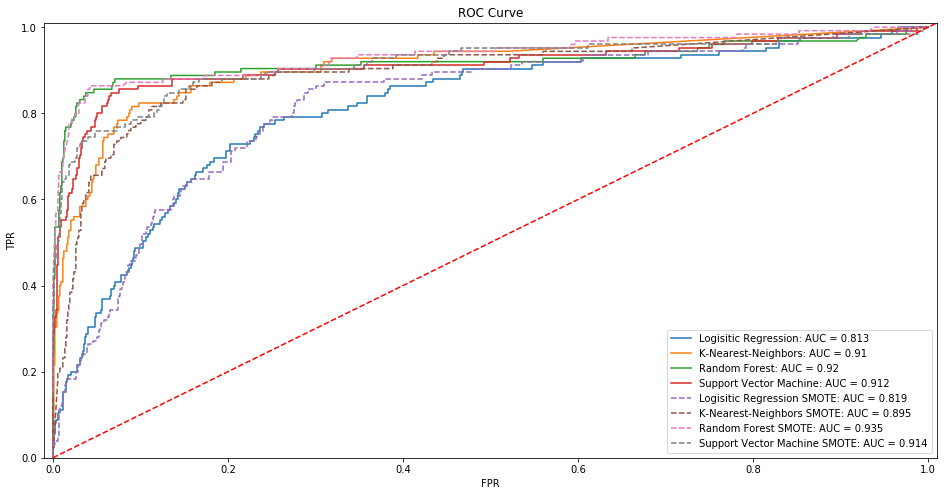

In [55]:
plot_roc_curves(pred_probs, model_name)


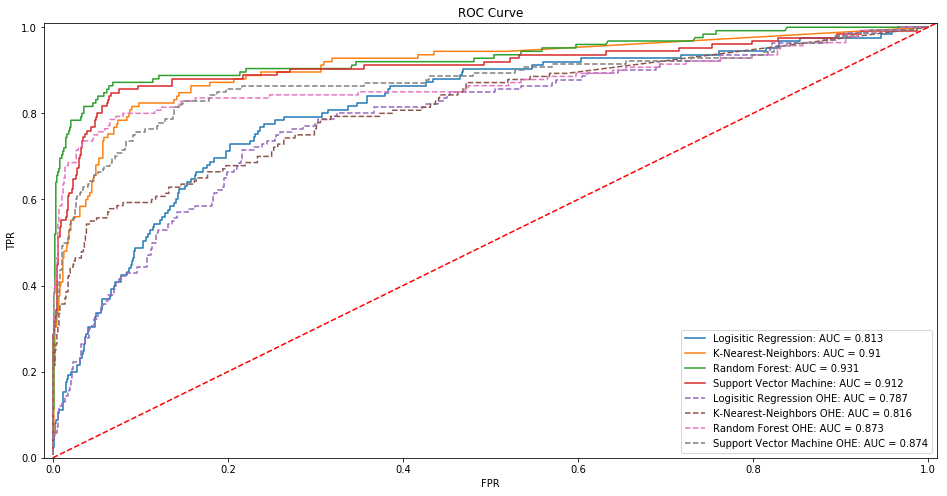

In [56]:
plot_roc_curves(pred_probs_OHE, model_name2)


In [57]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature


def plot_PD_curves(prob_list, model_names):
    precision_list = []
    recall_list = []
    AP_list = []
    for y_true, y_prob in prob_list:

        precision, recall, _  = precision_recall_curve(y_true, y_prob)
        average_precision = average_precision_score(y_true, y_prob)


        precision_list.append(precision)
        recall_list.append(recall)
        AP_list.append(average_precision)

    x = np.arange(0,y_true.shape[0]+1, y_true.shape[0])
    y = - x +1


    plt.figure(figsize = (16,8))
    plt.title("PR Curve")
    plt.ylabel("precision")
    plt.xlabel("recall")
    plt.xlim(-0.01, 1.01)
    plt.ylim(0,1.01)
    
    for precision, recall, average_precision, model_name in zip(precision_list, recall_list, AP_list,  model_names):
        if 'SMOTE' in model_name or 'OHE' in model_name:
            plt.plot(precision, recall, '--', label = "{}: AP = {:.3}".format(model_name, average_precision));
        else:
            plt.plot(precision, recall,  label = "{}: AP = {:.3}".format(model_name, average_precision));



    plt.plot(x,y,'--b');
    plt.legend(loc='lower right');


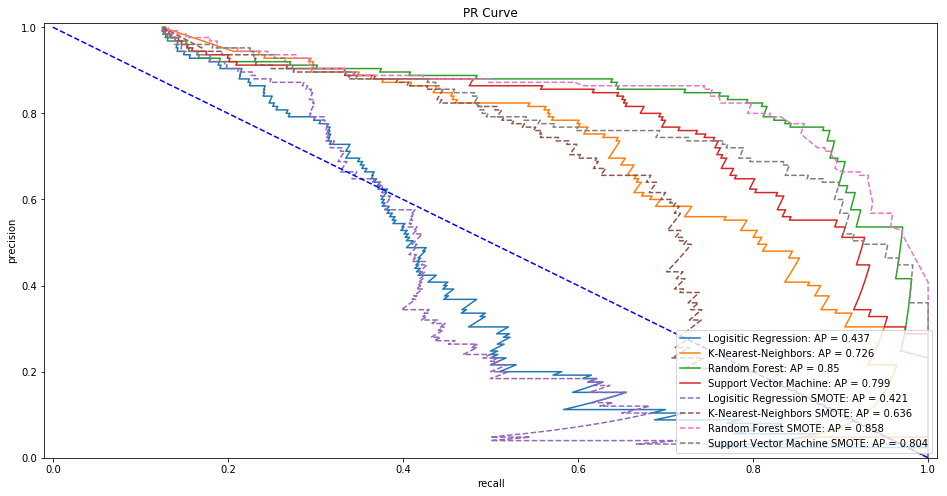

In [58]:
plot_PD_curves(pred_probs, model_name)


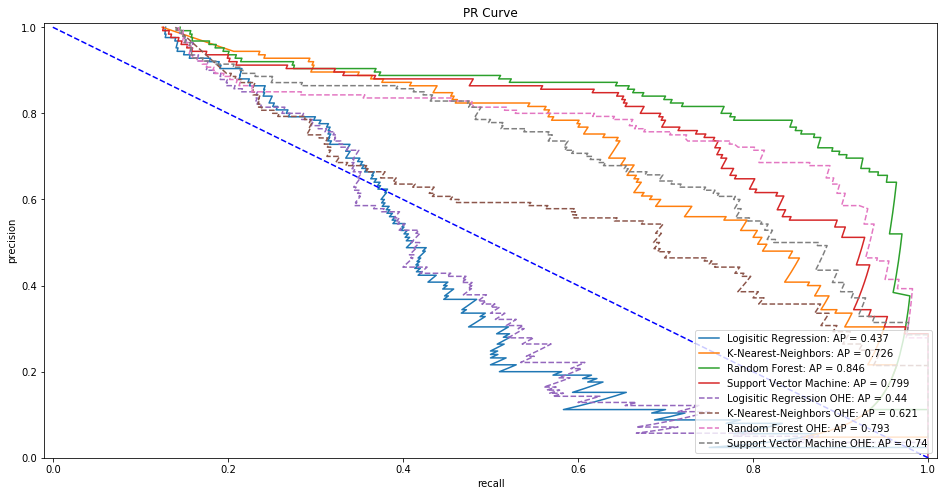

In [59]:
plot_PD_curves(pred_probs_OHE, model_name2)


# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).



#### Compare Feature Coefficients using feature matrix without one-hot-coding

In [60]:
LRmodel_l1 = LogisticRegression(penalty="l1")  # some feature may not good due to L1, some large some small
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print "Logistic Regression (L1) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_origin.columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression (L1) Coefficients
voice_mail_plan: -0.8677
number_customer_service_calls: 0.6736
intl_plan: 0.6136
total_day_minutes: 0.511
number_vmail_messages: 0.3982
total_eve_minutes: 0.3221
total_day_charge: 0.2234
total_intl_calls: -0.1737
total_intl_minutes: 0.167
total_night_charge: 0.1451
total_intl_charge: 0.0757
total_night_minutes: 0.0568
total_day_calls: 0.0504
total_eve_charge: 0.0352
total_night_calls: -0.0297
total_eve_calls: -0.0276


It is noticed that two of the corelated features have different L1 coefficents

total_night_charge: 0.1452;
total_night_minutes: 0.0567

total_eve_charge: 0.0615;
total_eve_minutes: 0.2958


In [61]:
LRmodel_l2 = LogisticRegression(penalty="l2")  # L2 many feature coefficents are closed to each other: colinear
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print "Logistic Regression (L2) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      churn_origin.columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression (L2) Coefficients
voice_mail_plan: -0.8948
number_customer_service_calls: 0.6737
intl_plan: 0.6138
number_vmail_messages: 0.4255
total_day_minutes: 0.3687
total_day_charge: 0.3664
total_eve_charge: 0.1798
total_eve_minutes: 0.1791
total_intl_calls: -0.1756
total_intl_charge: 0.123
total_intl_minutes: 0.1215
total_night_minutes: 0.1029
total_night_charge: 0.1009
total_day_calls: 0.0523
total_night_calls: -0.0317
total_eve_calls: -0.0296


The LR coefficients using L2 show that the corelated features tend to generate similar values due to the quadratic penalty terms. This property of L2 regurlarization makes it less powerful compared to L1 in term of feature selection.

For example

total_day_minutes: 0.3687;
total_day_charge: 0.3664

total_eve_charge: 0.1798;
total_eve_minutes: 0.1791

total_intl_charge: 0.123;
total_intl_minutes: 0.1215

total_night_minutes: 0.1029;
total_night_charge: 0.1009



### Part 4.2:  Random Forest Model - Feature Importance Discussion

The feature importance obtained from 

In [62]:
forest1 = RandomForestClassifier()
forest1.fit(X, y)

importances1 = forest1.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances1), churn_origin.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
total_day_charge: 0.1505
total_day_minutes: 0.1339
number_customer_service_calls: 0.121
intl_plan: 0.0894
total_eve_minutes: 0.0816
total_eve_charge: 0.0716
total_intl_calls: 0.0677
total_night_minutes: 0.0467
total_intl_charge: 0.0408
total_night_charge: 0.0367
number_vmail_messages: 0.0364
total_intl_minutes: 0.0341
total_night_calls: 0.029
total_eve_calls: 0.0231
total_day_calls: 0.0225
voice_mail_plan: 0.0149


In [63]:
## rfc3.estimators_ --> list of Decision Tree Classifer Instances 
std = np.std([tree.feature_importances_ for tree in forest1.estimators_],axis=0)
indices1 = np.argsort(importances1)[::-1]
print "Features ranked in order of importance\n"
features = []
for ind in indices1:
    features.append(churn_origin.columns[ind])
    print churn_origin.columns[ind]
    


Features ranked in order of importance

total_day_charge
total_day_minutes
number_customer_service_calls
intl_plan
total_eve_minutes
total_eve_charge
total_intl_calls
total_night_minutes
total_intl_charge
total_night_charge
number_vmail_messages
total_intl_minutes
total_night_calls
total_eve_calls
total_day_calls
voice_mail_plan


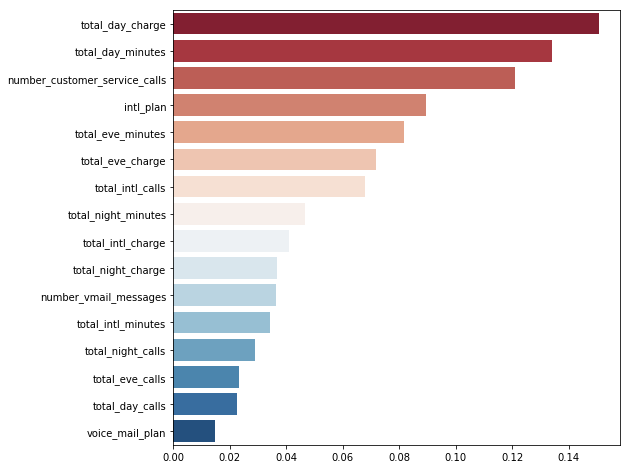

In [64]:
plt.figure(figsize = (8,8))
sb.barplot(importances1[indices1],features ,palette="RdBu")

#plt.xticks(range(16), indices1)
# plt.xlim([-1, 16])
# plt.ylim([0,.25])

It is reasonable that the most important features are the charge of the calls, as the customers who spend more money are more likely to drop and switch to other cell phone service providers. For LR and the Random Forest, the number of customer service calls is also quite important and is ranked at the Second or third. This makes sense since the users who called the customer service more tend to have more problems and are likely to drop as well.

# Part 5: Use Probabilities as Prediction Results

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

In [65]:
def run_prob_cv(X, y, clf_class, roc=False, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

Result Evaluation: Use the ground truth probability to compare with our probability prediction results.

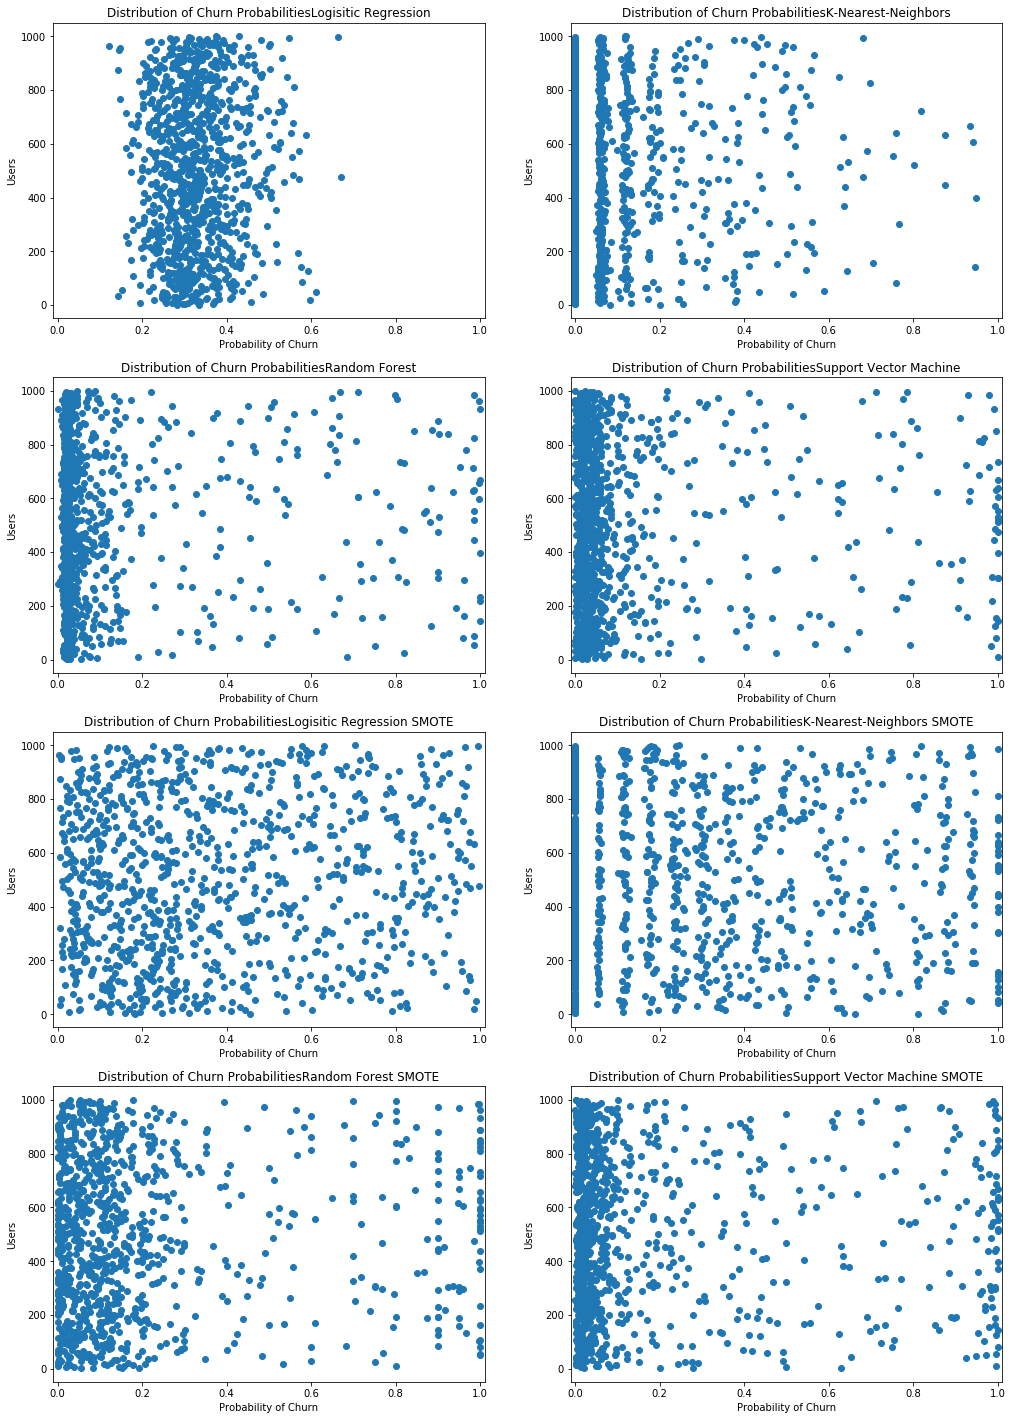

In [66]:
count = 420
fig = plt.figure(figsize = (17,25))
ii = 0    

for y_true, y_prob in pred_probs:
    model_name[ii]
    count+=1
    fig.add_subplot(count) 
    churn_p = y_prob
    users_rfc = np.arange(1,churn_p.size +1,1)
    
    plt.plot(churn_p,users_rfc, "o");
    plt.xlim([-0.01, 1.01]);
    plt.title("Distribution of Churn Probabilities" + model_name[ii]);
    plt.xlabel("Probability of Churn");
    plt.ylabel("Users");
    ii += 1

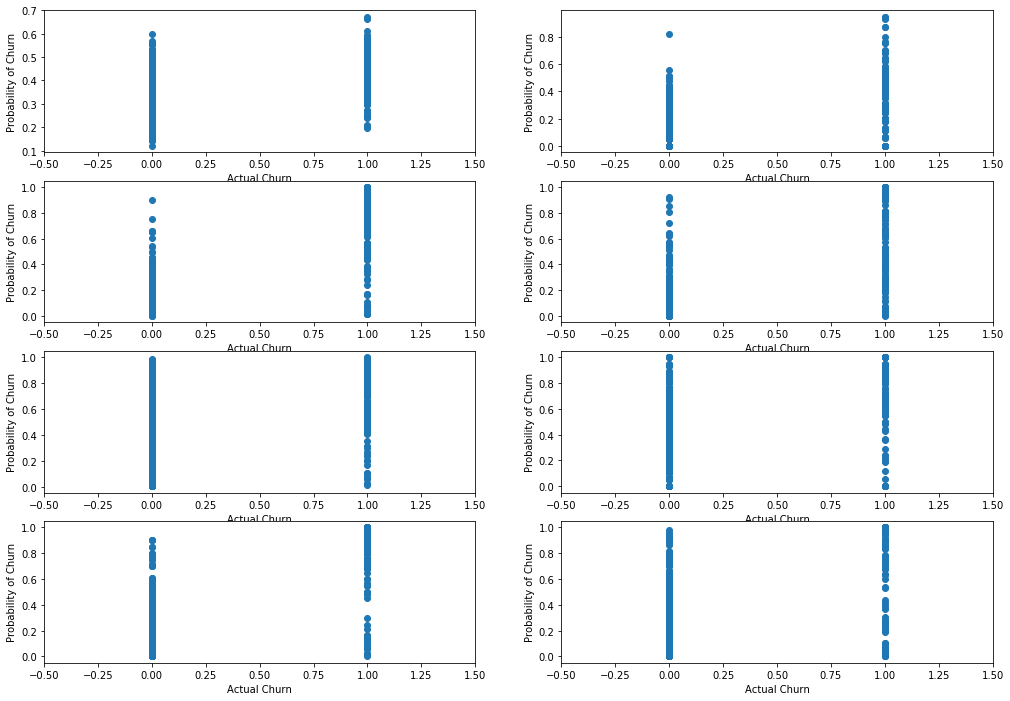

In [67]:
count = 420
fig = plt.figure(figsize = (17,12))
ii = 0    

for y_true, y_prob in pred_probs:
    
    model_name[ii]
    count+=1
    churn_p = y_prob

    fig.add_subplot(count) 
    plt.plot(y_true,churn_p ,"o");
    plt.xlim([-0.5, 1.5]);
    plt.ylabel("Probability of Churn");
    plt.xlabel("Actual Churn");
    ii += 1